輸入立委臉書粉專內容及選舉政見資料

In [1]:
import pandas as pd
import jieba
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

pd.set_option('display.max_colwidth', None)#setting the maximize string show

fb = pd.read_csv('nysu_10902_2019立委_research.csv')
politics = pd.read_csv('9th_legislator_promise.csv')
fb.page_name.unique() #觀察人名在資料集中叫什麼名字
politics.姓名.unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

以台南市立委陳亭妃為例，建立發文文字斷詞表

In [2]:
chen = fb[fb.page_name == "陳亭妃"]
chen.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
5922,111224078898553_2159899594030981,111224078898553,陳亭妃,政治人物,事實證明了，我們大家當初的堅持是沒有錯的！\n\n管中閔非法兼職一直以來都是既有事實，但有心人士卻始終要將整件事情導向是政治鬥爭，甚至是民進黨有計畫性的惡意攻擊，實在令人遺憾。\n\n而讓人不解的事，前教育部長葉俊榮明知非法兼職的事情存在，也知道監察院的整個調查程序已經即將告一段落，為何還是急於在結果出來前急於讓管中閔上任呢？\n\n彈劾結果出來之後，又有有心人士在散播消息說監察院是民進黨開的，在此我必須提醒大家，監察院絕對不是也不可能是民進黨開的！因為監察院29位的監察委員，其中有過半數都是馬政府時期所提名的，而此次投下同意彈劾的監委，更有馬英九前總統所提名的監委！\n\n這也代表管中閔非法兼職一事，連國民黨政府自提的監委也護航不下去！\n\n➡️追蹤我的ig:www.instagram.com/chen_tingfei/\n➡️加入我的line保持聯絡:@nhu2565u,NaN,link,https://www.facebook.com/111224078898553/posts/2159899594030981/,2019-01-15T07:01:12+0000,2019-01-15T15:01:12,...,管中閔違法兼職 監察院7：4通過彈劾 | 蘋果日報,台大校長管中閔已在上周上任，不過，對於他過去擔任學校主管及政府部門任職時在外兼職違法事宜，監察院今天召開管中閔兼職的彈劾審查，結果以7：4通...,981,0,0,0,0,0,59,36


In [3]:
chen['new_date'] = pd.to_datetime(chen['created_time_taipei']).dt.date
chen['month_year'] = pd.to_datetime(chen['new_date']).dt.to_period('M')
chen.head(1)

<ipython-input-3-9b761b10e2fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chen['new_date'] = pd.to_datetime(chen['created_time_taipei']).dt.date
<ipython-input-3-9b761b10e2fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chen['month_year'] = pd.to_datetime(chen['new_date']).dt.to_period('M')


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
5922,111224078898553_2159899594030981,111224078898553,陳亭妃,政治人物,事實證明了，我們大家當初的堅持是沒有錯的！\n\n管中閔非法兼職一直以來都是既有事實，但有心人士卻始終要將整件事情導向是政治鬥爭，甚至是民進黨有計畫性的惡意攻擊，實在令人遺憾。\n\n而讓人不解的事，前教育部長葉俊榮明知非法兼職的事情存在，也知道監察院的整個調查程序已經即將告一段落，為何還是急於在結果出來前急於讓管中閔上任呢？\n\n彈劾結果出來之後，又有有心人士在散播消息說監察院是民進黨開的，在此我必須提醒大家，監察院絕對不是也不可能是民進黨開的！因為監察院29位的監察委員，其中有過半數都是馬政府時期所提名的，而此次投下同意彈劾的監委，更有馬英九前總統所提名的監委！\n\n這也代表管中閔非法兼職一事，連國民黨政府自提的監委也護航不下去！\n\n➡️追蹤我的ig:www.instagram.com/chen_tingfei/\n➡️加入我的line保持聯絡:@nhu2565u,NaN,link,https://www.facebook.com/111224078898553/posts/2159899594030981/,2019-01-15T07:01:12+0000,2019-01-15T15:01:12,...,981,0,0,0,0,0,59,36,2019-01-15,2019-01


In [4]:
# 依照按讚數 低到高排序
chen = chen.sort_values(by=['like_count'])
# 用新的排序當作順序
chen.reset_index(inplace=True)

結巴斷詞 jieba

1.   len(liu): 看劉櫂豪的貼文總共有幾筆
2.   list(liu['message']): 把要斷詞的內容轉成 list 格式
3.   創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
4.   原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [5]:
doc_names = range(len(chen)) #有幾篇文章 : 444 篇文章
doc_names

range(0, 492)

In [6]:
chen = chen.replace(np.nan, '', regex=True) # 將nan取代成空白字串
text_list = list(chen['message']) # 把所有message轉成一個list 用for iterate

What is the difference between lcult() & cut()

In [7]:
# 先看第一個
words = jieba.lcut(text_list[0], cut_all = False) # lcut return a "list"
print(words)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 0.687 seconds.
Prefix dict has been built succesfully.


['我', '今天', '針對', '中國', '最大', '的', '影音', '串流', '平台', '「', '騰訊視頻', '」', '將循', '「', '愛奇藝', '」', '模式', '來台', '質詢', '、', '提醒', '經濟部', '部長', '沈榮津', '…', '.', '\n', '\n', '雖然', '「', '愛奇藝', '」', '105', '年', '被', '經濟部', '投審會', '以', '我國', '還沒有', '開放', '「', '中國', '的', '線', '上', '影音', '串流', '服務業', '來', '台', '」', '與', '依照', '「', '涉及', '陸資許', '可', '辦法', '」', '規定', '，', '愛奇藝', '具有', '政治', '、', '社會', '、', '文化', '敏感性', '兩項', '理由', '駁回', '，', '但', '愛奇藝', '卻', '依舊', '在', '中國架', '設', '「', '愛奇藝', '台灣', '網站', '」', '照常', '營運', '，', '甚至', '已躍升', '為', '台灣', '使用者', '最多', '的', 'OTT', '平台', '，', '並透過', '台灣', '代理商', '在', '火車', '站', '大', '剌', '剌', '經銷', '、', '廣告', '宣傳', '。', '\n', '騰訊', '背後龐大', '的', '資金', '和', '公司', '內設', '黨部', '、', '書記', '比照', '中共', '國營', '事業', '，', '規模', '是', '愛奇藝', '的', '好', '幾倍', '，', '如果', '讓', '它', '成功', '循愛奇藝', '模式', '侵台', '，', '將嚴', '重影', '響到', '台灣', '文化', '、', '影視', '環境', '。', '\n', '所以', '，', '我', '特別', '要求', '經濟部', '，', '不用', '再', '和', 'NCC', '和', '文化部', '等', '單位', '推來', '推去', '，', '經濟部

In [8]:
words = jieba.cut(text_list[0], cut_all = False) 
print(words)
#for word in words:
 #   print(word)

<generator object Tokenizer.cut at 0x000002D7AE2D43C0>


把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，劉櫂豪的篇數有999篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的劉櫂豪貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和liu_docs合併。</br> 最後我們liu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [9]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")
punctuation = " //，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

# creat a df to store the jieba result
chen_docs = pd.DataFrame(columns=['jieba_results']) # 建立df
chen_docs['jieba_results'] = chen_docs['jieba_results'].astype('str')

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text) # 把上面那些符號從text中刪掉
    text = re.sub(r'[0-9]','',text) # 刪掉數字
    text = re.sub(r'[a-zA-Z]','',text) #刪掉英文字
#刪除文字 更多標點符號
    text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗🎉⏰💪㊙️✨🔺😁😅😍⬇🙏✅🎈🔥📱👍👊🔸📍]','',text)  # 注意裡面不能有空白！
    s = pd.Series({'jieba_results': text})
    chen_docs = chen_docs.append(s, ignore_index=True)#每次的斷詞結果都加回liu_docs


In [13]:
chen_docs.iloc[481:,]  #從讚數最多的檢查

,jieba_results
481,早安 上工 了 今天 出門 要 穿 暖 一點 喔 蔡英文 陳亭妃 聯合 競選總部 成立大會 月 日 星期六 下午 點 草湖 寮 代天 宮旁 空地 北安路 與 安 中路 交叉口
482,已經 一直 衝衝衝 了 但 還是 有 很多 中秋節 的 活動 趕 不及 真的 很 不好意思 跑 到 最後都 只 剩下 黑鴉 鴉 一片 這時 才 發現 自己 的 肚子 已經 咕嚕 咕嚕 的 叫 了 當然 要 立馬來 碗 巷 仔口 的 牛肉 湯 囉 安南 區 北安路 與 長 溪 路口
483,衷心 感謝 今天 到場 相挺 的 好友 以及 在 線上 為 我 加油 打氣 的 大家 現場 湧 入超 過 一萬 五千名 鄉親 讓 亭妃 心中 只有 滿滿 的 感謝 與 感動 · 我 今天 在 台上 說 到 自一 開始 踏入 政壇 爸爸 陳 佳照 就 告訴 我 沒有 甚麼 能 留給 你 留給 你 的 就是 一顆 服務 的 心 我 現在 能 勇敢 大聲 地 說 出來 年前 的 陳亭妃 與 現在 的 陳亭妃 一點 都 沒 有 改變 永遠 是 那個 以民為 主 跟 鄉親 站 在 一起 的 陳亭妃 · 感謝 一路 以來 從 議員 到 立委 陪 在 身邊 不離 不棄 的 你 年 來 陪 我 走過 每 一個 關卡 每一個 困難 希望 在 明年 月 日能 用 選票 再度 給予 肯定 讓 每 一張 選票 票票 入 匱 給我 力量 繼續 為 這片 土地 努力 打拼 · 新聞 精彩 畫面 👉 再次 深深 感謝 台灣 要贏
484,昨天 助理 跟 著 我衝 衝 衝了 一整天 怕 他們 太累 嚇到 了 所以 今天 的 第一 個 行程 呢 哈哈 準備 自己 開車 上工 了
485,我們 把 世界 冠 軍 留在 台灣 了 🏆 🏆 🏆 謝謝 優秀 的 台灣 小將 今天 這份 榮耀 絕對 是屬 於 你 們 的 身為 台灣 人 的 大家 也 以 你 們 精彩 的 表現 感到 驕傲 真的 是 太棒了 你們 終於 不用 再 吃 鍋貼 了 台灣 南波 萬
486,最貼 心 的 老朋友 當我 拿出 號的 文宣面 紙時 他 也 拿出 了 一包 我 年前 一樣 抽中 號的文 宣面紙 真是 感動 他 居然 把 一包 文宣面紙 保留 了 年 謝謝 好友 們 的 一路 相挺 安南 區北區 號 陳亭妃
487,我們 需要 乾淨 的 選舉 拒絕 攻擊 拒絕 抹黑 拒絕 賄選 懇請 支持 連線 顧台灣 一 世人 的 號 蔡英文 號 陳亭妃 號 民進黨
488,嗨 今天 的 妃妃 姐姐 派 對 好玩 嗎 不能 來 也 沒關係 現場 花絮 報 你 搶先看 喔 ☺ · 未來 還會 舉辦 多場 不同 主題 的 親子活動 甚至 有 隱藏版 小遊戲 記得 加入 亭妃 的 頻道 才能 優先 報名 唷
489,雨衣 雨鞋 全副 武裝 跑行程 瞭解 各區 狀況
490,謝謝 大家 的 參與 今天 妃妃姐姐親子活力派對 大 爆滿 ‼ 亭妃 化身 孩子王 也 玩 得 好 開心 不要 忘記 下 週日 我們 樺谷夜市 再見 時間 週日 上午 地點 樺谷夜市 安富街 號 未來將 舉辦 多場 不同 主題 親子活動 記得 加入 陳亭妃 頻道 鎖定 最新 訊息 @ 或 搜尋 @


In [14]:
chen['jieba_results'] = chen_docs
chen_post = chen[['new_date','message','jieba_results','like_count']]
chen_post

,new_date,message,jieba_results,like_count
0,2019-03-20,我今天針對中國最大的影音串流平台「騰訊視頻」將循「愛奇藝」模式來台質詢、提醒經濟部部長沈榮津….\n\n雖然「愛奇藝」105年被經濟部投審會以我國還沒有開放「中國的線上影音串流服務業來台」與依照「涉及陸資許可辦法」規定，愛奇藝具有政治、社會、文化敏感性兩項理由駁回，但愛奇藝卻依舊在中國架設「愛奇藝台灣網站」照常營運，甚至已躍升為台灣使用者最多的OTT平台，並透過台灣代理商在火車站大剌剌經銷、廣告宣傳。\n騰訊背後龐大的資金和公司內設黨部、書記比照中共國營事業，規模是愛奇藝的好幾倍，如果讓它成功循愛奇藝模式侵台，將嚴重影響到台灣文化、影視環境。\n所以，我特別要求經濟部，不用再和NCC和文化部等單位推來推去，經濟部本身應該嚴格把關的一定要做、肩膀要硬起來，民眾一看到代理商第一直覺就會覺得是經濟部管的，千萬不要又讓騰訊成功鑽法律漏洞，這樣才能有效防堵、反制中國對台的圖謀！,我 今天 針對 中國 最大 的 影音 串流 平台 騰訊視頻 將循 愛奇藝 模式 來台 質詢 提醒 經濟部 部長 沈榮津 雖然 愛奇藝 年 被 經濟部 投審會 以 我國 還沒有 開放 中國 的 線上 影音 串流 服務 業來 台 與 依照 涉及 陸資許 可 辦法 規定 愛奇藝 具有 政治 社會 文化 敏感性 兩項 理由 駁回 但 愛奇藝 卻 依舊 在 中國 架設 愛奇藝 台灣 網站 照常 營運 甚至 已躍升 為 台灣 使用者 最多 的 平台 並透過 台灣 代理商 在 火車站 大 剌 剌 經銷 廣告 宣傳 騰訊 背後龐大 的 資金 和 公司 內設 黨部 書記 比照 中 共 國營事業 規模 是 愛奇藝 的 好 幾倍 如果 讓 它 成功 循愛奇藝 模式 侵台 將嚴 重影 響到 台灣 文化 影視 環境 所以 我 特別 要求 經濟部 不用 再 和 和 文化部 等 單位 推來 推去 經濟部 本身 應該 嚴格 把關 的 一定 要 做 肩膀 要 硬 起來 民眾 一 看到 代理商 第 一直 覺 就 會 覺得 是 經濟 部管 的 千萬 不要 又 讓 騰訊 成功 鑽 法律 漏洞 這樣 才能 有效 防堵 反制 中國 對台 的 圖謀,180
1,2019-09-12,中秋立委不烤肉，玩起交換禮物⁉\n12立委禮物大PK直播來囉！\n \n看看大家到底拿出什麼壓箱寶出來PK，讓我們繼續看下去 ㊙️㊙️㊙️\n \n直播網址｜http://bit.ly/2NSReoa \n \n#美女主播洪婉臻\n#神秘來賓 #今秋不烤肉\n#12立委陪大家過中秋,中 秋 立委 不 烤肉 玩起 交換 禮物 ⁉ 立委 禮物 大 直播 來 囉 看看 大家 到底 拿出 什麼 壓箱 寶出 來 讓 我們 繼續 看 下去 直播 網址 美 女主播 洪婉臻 神秘 來賓 今秋 不 烤肉 立委 陪 大家 過中秋,194
2,2019-03-15,▶ #三立前進新台灣 Part 2,三立前 進新 台灣,211
3,2019-07-05,#假新聞清潔劑 是一個致力於預防假消息的街頭行動團體，對不熟悉網路世界的長輩們來說，假新聞其實是相當嚴重的課題，對民眾帶來巨大的誤導與傷害。\n \n他們利用6個月的時間，已經走遍全台7個縣市，舉辦超過80場志工培訓，就是為了宣導假新聞的嚴重性，希望能一點一滴建立民主社會的基礎防禦力。\n \n📍本週日即將來到台南，邀請大家踴躍參加！作伙來學習如何進行事實查證。\n \n－－－ \n✨假新聞清潔劑 7/7（日）要來到台南了！！✨\n \n❗讓我們走上街頭，\n一起提升民主社會的基礎防禦力吧！\n \n🔺先鋒志工培訓\n時間：7/7 (日) 10:00 ~ 12:00\n地點：德光里活動中心二樓 (臺南市東區崇德路111號)\n報名連結：https://forms.gle/Q2g9A2w1VjGMJppU6\n \n🔺這是我們的半年行動成果，歡迎你的加入! 我們一起努力。\nhttp://bit.ly/2X8lZLA\n \n#杜絕假新聞,假新聞清潔劑 是 一個 致力 於 預防 假消息 的 街頭 行動 團體 對 不 熟悉 網路 世界 的 長輩 們 來 說 假新聞 其實 是 相當 嚴重 的 課題 對民眾 帶來 巨大 的 誤導 與 傷害 他們 利用 個 月 的 時間 已經 走遍 全台 個 縣市 舉辦 超過 場 志工培訓 就是 為 了 宣導 假新聞 的 嚴重性 希望 能 一點 一滴 建立 民主社會 的 基礎 防禦力 本週 日 即 將來 到 台南 邀請 大家 踴躍參加 作伙 來學習 如何 進行 事實查證 假新聞清潔劑 日 要來 到 台南 了 讓 我們 走上 街頭 一起 提升 民主社會 的 基礎 防禦力 吧 先鋒 志工培訓 時間 日 ~ 地點 德光里 活動 中心 二樓 臺 南市 東區 崇德 路 號 報名 連結 這是 我們 的 半年 行動 成果 歡迎 你 的 加入 我們 一起 努力 杜絕 假新聞,218
4,2019-03-06,每年電價的調漲與否，一直以來都是大家最關心的民生議題。\n\n所以在經濟委員會質詢時，我特地請經濟部沈榮津部長針對今年電價是否調漲一事，向社會大眾進行報告。\n\n而沈部長當場也表達了經濟部的立場：在今年原油價格相較去年並未上漲的情況下，民生用電將不進行價格的調漲！希望能將民生的影響降至最小！,每年 電價 的 調漲 與 否 一直 以來 都 是 大家 最關心 的 民生議題 所以 在 經濟委員會 質詢 時 我 特地 請 經濟部 沈榮津部長 針對 今年 電價 是否 調漲 一事 向 社會大眾 進行 報告 而 沈部長 當場 也 表達 了 經濟部 的 立場 在 今年 原油價格 相較 去年 並未 上漲 的 情況 下 民生用電 將不進 行價格 的 調漲 希望 能將 民生 的 影響 降至 最小,225
...,...,...,...,...
487,2020-01-02,我們需要乾淨的選舉～拒絕攻擊、拒絕抹黑、拒絕賄選，懇請支持33連線顧台灣一世人的3號蔡英文、3號陳亭妃、14號民進黨,我們 需要 乾淨 的 選舉 拒絕 攻擊 拒絕 抹黑 拒絕 賄選 懇請 支持 連線 顧台灣 一 世人 的 號 蔡英文 號 陳亭妃 號 民進黨,6964
488,2019-11-24,嗨！今天的妃妃姐姐派對好玩嗎？不能來也沒關係，現場花絮報你搶先看喔☺\n · \n未來還會舉辦多場不同主題的親子活動，甚至有隱藏版小遊戲，記得加入亭妃的Line頻道，才能優先報名唷⬇⬇⬇\n📱line://app/1606462914-lBY4V4GX?fei-squad,嗨 今天 的 妃妃 姐姐 派 對 好玩 嗎 不能 來 也 沒關係 現場 花絮 報 你 搶先看 喔 ☺ · 未來 還會 舉辦 多場 不同 主題 的 親子活動 甚至 有 隱藏版 小遊戲 記得 加入 亭妃 的 頻道 才能 優先 報名 唷,6970
489,2019-08-13,雨衣、雨鞋全副武裝跑行程，瞭解各區狀況！,雨衣 雨鞋 全副 武裝 跑行程 瞭解 各區 狀況,7187
490,2019-11-17,謝謝大家的參與，今天「妃妃姐姐親子活力派對」大爆滿‼ 亭妃化身孩子王也玩得好開心😁不要忘記11/24下週日我們樺谷夜市再見～\n \n📍時間：11/24週日上午9:30-11:30\n📍地點：樺谷夜市（安富街346號）\n \n----------\n✨未來將舉辦多場不同主題親子活動，記得加入陳亭妃Line頻道鎖定最新訊息⬇⬇⬇\nhttps://line.me/R/ti/p/@nhu2565u 或ID搜尋 @nhu2565u,謝謝 大家 的 參與 今天 妃妃姐姐親子活力派對 大 爆滿 ‼ 亭妃 化身 孩子王 也 玩 得 好 開心 不要 忘記 下 週日 我們 樺谷夜市 再見 時間 週日 上午 地點 樺谷夜市 安富街 號 未來將 舉辦 多場 不同 主題 親子活動 記得 加入 陳亭妃 頻道 鎖定 最新 訊息 @ 或 搜尋 @,7864


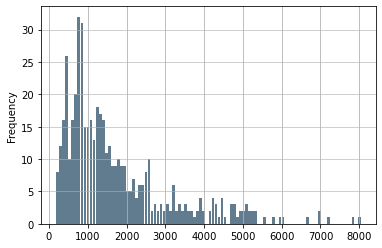

In [15]:
# 看讚數的分佈 y 軸是該讚數的貼文數 來看我們要怎麼取哪個讚數區間資料
commutes = chen_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [16]:
temp = chen_post[(chen_post['like_count'] <= 2000) & (chen_post['like_count'] > 500)] #讚數大於500 小於1000才取 : 201  篇文章
temp

,new_date,message,jieba_results,like_count
63,2019-08-14,抗議中國鴨霸，祈願香港平安！\n\n稍早美國總統川普在個人推特上發文：根據美方情報單位所掌握到的資訊，中共解放軍目前已在前往香港的路上！\n\n看來中共官方將準備以武力來解決此次的香港示威行動！！！,抗議 中國 鴨霸 祈願 香港 平安 稍早 美國總統 川普 在 個 人 推特上 發文 根據 美方 情報 單位 所 掌握 到 的 資訊 中 共 解放 軍 目前 已 在 前往 香港 的 路上 看來 中 共 官方 將準備 以 武力 來 解決 此次 的 香港 示威 行動,508
64,2019-09-23,為了打造高齡友善城市，亭妃從今年3月就開始積極結合成大、台鐵、區公所研擬計畫，希望爭取「臺南市北區 2019-2022 年地方創生計畫」，而且今年是創生元年，意義更加不同。不過，雖然大家都非常努力，卻換得台南市政府的不斷打臉，讓人失望。\n\n國發會主委陳美伶當場允諾表示，北區的地方創生計畫已經算是完整了，學術面、產業面都有兼顧到，而且地方創生計劃的平台在中央，市府不應該退案，會要求台南市政府立即把計畫送到國發會！,為 了 打造 高齡 友善 城市 亭妃 從 今年 月 就 開始 積極結 合成 大 台鐵 區 公所 研擬 計畫 希望 爭取 臺 南 市北 區 年 地方 創生 計畫 而且 今年 是 創生 元年 意義 更加 不同 不過 雖然 大家 都 非常 努力 卻換 得 台南市 政府 的 不斷 打臉 讓 人 失望 國發會 主委 陳 美伶當場 允諾 表示 北區 的 地方 創生 計畫 已經 算是 完整 了 學術面 產業 面都 有 兼 顧到 而且 地方 創生 計劃 的 平台 在 中央 市府 不應 該 退案 會 要求 台南市 政府 立即 把 計畫 送到 國發會,511
65,2019-11-30,【 沙崙綠能科學城 】\n\n科技部配合國家整體綠能科技產業創新方案，在綠能建設中的「沙崙綠能科學城」部分，將加速核心區建設的開發，並完善周圍基盤配套。科技部負責建置其中的「綠能科技聯合研究中心」及「科學城低碳智慧環境基礎建置」，共編列特別預算56.65億元。以下就兩項建設進行說明：\n\n 1、綠能科技聯合研究中心：\n建設期程為106～115年，總經費78.89億元，特別預算編列51億元。本研究中心將作為台灣產學研界在綠能技術研究領域的服務提供者，提供產學研界進行前瞻技術開發，培育綠能實作人才，提供前瞻綠能研發平台，引入學界及法人進駐，深耕綠能產業發展的關鍵及前瞻技術，鏈結業界需求；在能源科技創新方面，將以節能、儲能、創能與系統整合為主軸，推動先進能源技術研究及其應用之研發創新，著重前端綠色製程設備及後端之創新應用。\n\n 2、科學城低碳智慧環境基礎建置：\n建設期程為106～110年，總經費5.65億元，預計建置低碳智慧運輸系統、智慧生態園區、自駕車測試場域等相關建設，並逐步導入綠能相關基盤系統，以加速推動綠能科學城發展。\n透過相關建設的推動，強化「綠能產業研究聚落」的特色，配合整體綠能科技產業創新推動方案，並結合大學研究機構、台糖公司、台南市政府的會展中心及商業區，吸引國內外大廠及法人團體進駐與合作，將沙崙綠能科學城打造為「綠能科技的示範場域」。\n \n3、綠能科技聯合研發計畫：\n建設期程為108～109年，總經費12.21億元。依據科技部推動基礎及應用科技研究、重大科技研發計畫之任務，配合沙崙智慧綠能科學城之建設，推動綠能科技聯合研發計畫。推動目標包括綠能創新技術開發與綠能應用技術合作等，藉由綠能產業示範推廣、綠能科技產學研跨領域合作等，以提升科技研發成效與產業發展之互動關係，全力達成發展再生能源高占比、提高能源自主比例、帶動新興綠能產業發展以及提升產業科研競爭力，進而引領產業轉型。,沙崙 綠能 科學城 科技部 配合 國家 整體 綠能 科技 產業 創新 方案 在 綠能 建設 中 的 沙崙 綠能 科學城 部分 將 加速 核心 區建設 的 開發 並 完善 周圍 基盤 配套 科技部 負責 建置 其中 的 綠能 科技 聯合 研究 中心 及 科學城 低 碳 智慧 環境 基礎 建置 共編 列特 別 預算 億元 以下 就 兩項 建設 進行 說明 綠能 科技 聯合 研究 中心 建設 期程 為 年 總經費 億元 特別 預算 編列 億元 本 研究 中心 將作 為 台灣 產學 研界 在 綠能 技術 研究 領域 的 服務 提供者 提供 產學 研界 進行 前瞻 技術 開發 培育 綠能 實作 人才 提供 前瞻 綠能 研發 平台 引入 學界 及 法人 進駐 深耕 綠能產業 發展 的 關鍵 及 前瞻 技術 鏈 結業界 需求 在 能源 科技 創新 方面 將以 節能 儲能 創能 與 系統 整合 為主軸 推動 先進 能源 技術 研究 及其 應用 之 研發 創新 著重 前端 綠 色 製 程 設 備 及 後 端 之 創 新 應 用 科學城 低 碳 智慧 環境 基礎 建置 建設 期程 為 年 總經費 億元 預計 建置 低碳 智慧 運輸 系統 智慧 生態 園區 自駕 車測 試場域 等 相關 建設 並 逐步 導入 綠能 相關 基盤 系統 以 加速 推動 綠能 科學城 發展 透過 相關 建設 的 推動 強化 綠能產業 研究 聚落 的 特色 配合 整體 綠能 科技 產業 創新 推動 方案 並結 合大學 研究 機構 台糖公司 台南市 政府 的 會展 中心 及 商業區 吸引 國內 外大廠 及 法人 團體 進駐 與 合作 將沙崙 綠能 科學城 打造 為 綠能 科技 的 示範場域 綠能 科技 聯合 研發 計畫 建設 期程 為 年 總經費 億元 依據 科技部 推動 基礎 及 應用 科技 研究 重大 科技 研發 計畫 之 任務 配合 沙崙 智慧 綠能 科學城 之 建設 推動 綠能 科技 聯合 研發 計畫 推動 目標 包括 綠能 創新 技術 開發 與 綠能 應用 技術 合作 等 藉由 綠能產業 示範 推廣 綠能 科技 產學 研跨 領域 合作 等 以 提升 科技 研發 成效 與 產業 發展 之 互動 關係 全力 達成 發展 再生能源 高 占 比 提高 能 源 自主 比例 帶動 新興 綠能產業 發展 以及 提升 產業 科研 競爭力 進而 引領 產業 轉型,519
66,2019-03-16,我帥嗎？我美嗎？我們可是把自己的自畫像穿在身上喔！,我帥 嗎 我美 嗎 我們 可是 把 自己 的 自畫 像 穿 在 身上 喔,522
67,2019-09-13,這是感冒燒聲的我😅😅😅\n但還是要使盡吃奶力氣💪\n跟好友們說聲中秋節快樂！\n \n昨天沒看到交換禮物直播的朋友別擔心！這裡也看得到喔！\n \n我準備的是麻豆農會結合文創設計的 #麻豆柚花淨白面膜禮盒，不僅送禮精緻大方，還可以美白肌膚。抽到的 莊瑞雄-雄有戰力 雄哥有福啦！他天天在屏東曬日頭，剛好可以保養一下帥氣的臉龐👍\n \n🙏陳歐珀 送的宜蘭金棗真是天助我也！救救我的破喉嚨啊～\n \n—————— \n✅同場加映：你投票了嗎？\n歌唱大賽抽獎網址▶ https://line.me/R/ti/p/@nhu2565u\n🔥缺你１票．妃你不可🔥,這是 感冒 燒聲 的 我 但 還是 要 使 盡 吃奶 力氣 跟 好友 們 說聲 中秋節 快樂 昨天 沒 看到 交換 禮物 直播 的 朋友 別 擔心 這裡 也 看 得到 喔 我 準備 的 是 麻豆 農會 結合 文創 設計 的 麻豆 柚花 淨白 面膜 禮盒 不僅 送禮 精 緻 大方 還 可以 美白 肌膚 抽到 的 莊瑞雄 雄有 戰力 雄哥 有福 啦 他 天天 在 屏東 曬 日頭 剛好 可以 保養 一下 帥氣 的 臉 龐 陳歐珀 送 的 宜蘭金棗 真是 天助 我 也 救救 我 的 破 喉嚨 啊 同場 加映 你 投票 了 嗎 歌唱 大賽 抽獎 網址 @ 缺 你 １ 票 ． 妃 你 不可,524
...,...,...,...,...
345,2019-09-14,跑行程最佳收獲～烤肉一盤\n而且是極專業的喔！,跑行程 最佳 收獲 烤肉 一盤 而且 是 極專業 的 喔,1946
346,2019-10-13,晚安！分享一下妃妃心情故事\n\n國慶連假只剩最後13分鐘，在這四天相信好友們都有豐富的收獲，當然我也利用這幾天的早上，到菜市場見見老朋友，聽到大家的加油聲，就是亭妃的動力。\n\n明天立法院又開始開會了，真的要拜託好友們，做亭妃的分身，幫忙亭妃在安南區、北區拉票、顧票、催票，讓亭妃更有力量為台灣、為台南衝衝衝！\n\n#2020台灣要贏\n#安南區北區\n#蔡英文陳亭妃,晚安 分享 一下 妃妃 心情 故事 國慶連假 只 剩 最 後 分鐘 在 這 四天 相信 好友 們 都 有 豐富 的 收獲 當然 我 也 利用 這幾天 的 早上 到 菜市 場見 見 老朋友 聽到 大家 的 加油 聲 就是 亭妃 的 動力 明天 立法院 又 開始 開會 了 真的 要 拜託 好友 們 做 亭妃 的 分身 幫忙 亭妃 在 安南 區 北區 拉票 顧票 催票 讓 亭妃 更 有 力量 為 台灣 為 台南 衝衝衝 台灣 要贏 安南 區北區 蔡英文 陳亭妃,1955
347,2019-07-05,行政院副院長陳其邁南下關心瞭解台南市登革熱疫情防治狀況⋯,行政院副院長 陳其邁 南下 關心 瞭解 台南市 登革熱 疫情 防治 狀況,1962
348,2020-01-07,副總統賴清德車隊返鄉衝刺‼\n邀請好友們站出來替台灣加油‼\n \n📍1/8週三下午14:50 車隊掃街路線

TF-IDF
我們把剛才斷好詞的貼文，轉成list形式，全部放到corpus變數裡面，方便做tf-idf處理。

CountVectorizer算字頻（搭配fit_transform）
TfidfTransformer計算TFIDF

In [17]:
corpus = temp['jieba_results'].values.tolist() #如果不做這個、結果會不同 太generall

In [18]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  # 計算單字出現在文件中的次數
X = vectorizer.fit_transform(corpus) #  input must be a list, return a matrix (#of corpus) x (# of word) # 201 x 4835
word = vectorizer.get_feature_names() # column name which is the word
message_column = word

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  # 計算tfidf
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X) # X : corpus x word matrix, output:201 x 4835

In [19]:
tfidf_view = pd.DataFrame(tfidf.toarray(), columns = vectorizer.get_feature_names())
tfidf_view

,一一,一下,一事,一些,一人,一份,一位,一併,一來,一個,...,鼓地,鼻東南,齊下,齊聚,齡社會,龍爭,龍眼,龍虎塔,龍頭,龐大
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.102288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283,0.0,0.130882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# #使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=6, random_state=None)
LDA.fit(X) # 用countrvectorizer() result 去fit 

topic_message = list()
#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    mes_topic = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(mes_topic)
    for i in mes_topic:
        topic_message.append(i)

TOP 10 WORDS PER TOPIC #0
['亭妃', '因為', '韓國瑜', '企業', '表示', '大家', '國民黨', '總統', '轉型', '數位']
TOP 10 WORDS PER TOPIC #1
['我們', '亭妃', '立委', '棒球', '台南', '中國', '蔡英文', '總統', '台灣', '韓國瑜']
TOP 10 WORDS PER TOPIC #2
['煤量', '促進', '總統', '台電', '我們', '台灣', '萬公噸', '香港', '亭妃', '韓國瑜']
TOP 10 WORDS PER TOPIC #3
['加油', '病毒', '澳洲', '香港', '我們', '中國', '大家', '台南', '亭妃', '台灣']
TOP 10 WORDS PER TOPIC #4
['幼兒', '一起', '大家', '科技', '我們', '研究', '綠能', '補助', '亭妃', '台灣']
TOP 10 WORDS PER TOPIC #5
['上午', '韓國瑜', '補助', '總統', '香港', '妃妃', '今天', '亭妃', '我們', '台灣']


In [21]:

LDA.fit(tfidf) # 用tfidf result 去fit 

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['香港', '情人', '妃妃', '台南', '就是', '韓國瑜', '節快', '好友', '台灣', '亭妃']
TOP 10 WORDS PER TOPIC #1
['晚安', '心聲', '我們', '台南', '妃妃', '大家', '亭妃', '台灣', '好友', '早安']
TOP 10 WORDS PER TOPIC #2
['中國', '國際', '平安', '香港', '加油', '亭妃', '總統', '我們', '韓國瑜', '台灣']
TOP 10 WORDS PER TOPIC #3
['現在', '香港', '韓國瑜', '大家', '總統', '亭妃', '我們', '一起', '台南', '台灣']
TOP 10 WORDS PER TOPIC #4
['活動', '今天', '香港', '農委會', '補助', '我們', '小英總統', '亭妃', '加油', '台灣']
TOP 10 WORDS PER TOPIC #5
['預算', '選舉', '孩子', '爭取', '妃妃', '開跑', '聖母', '活動', '台南', '上午']


In [22]:
#政見做斷詞

politics_chen = politics[politics.姓名 == "陳亭妃"].政見.to_string()
politics_chen = re.sub(re_punctuation, "", politics_chen)
politics_chen = re.sub(r'[0-9]','',politics_chen)
politics_chen = re.sub(r'[a-zA-Z]','',politics_chen)
politics_chen = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',politics_chen)  # 注意裡面不能有空白！
jieba.load_userdict("dict.txt")
words = jieba.lcut(politics_chen, cut_all = False)


In [23]:
# 比較、查看他政見
promise = politics[politics.姓名 == "陳亭妃"].政見.to_string()
re.split('。 |：', promise) # skip this, just to make it easier to read

['57    堅持台灣主體性，強化國家競爭力與國際連結，力推台灣成為正常化國家',
 '一、推動完成18歲公民權',
 '二、推動下修公投法與罷免門檻',
 '三、推動國會改革',
 '建構一個人民的、參與的與專業的國會',
 '四、協助政府推動加入TPP、FTA',
 '五、推動黨產歸零',
 '處理不當黨產處理條例',
 '六、把關食安、督促政府落實食管法，杜絕黑心食品',
 '七、力推核四不商轉、2025年非核家園',
 '八、督促政府落實河川治理與解決水患問題，打造休憩環境',
 '九、督促政府落實「中研院南部院區」經費編列',
 '十、爭取「國家圖書南部分館」設置台南，建全資訊平台',
 '十一、爭取沙崙成立「創新綠能科技園區」，帶動周邊產業投資',
 '十二、爭取教育經費與資源，改善國中小老舊校舍，讓學童上課專心、家長安 心',
 '十三、爭取培訓經費，讓台南優質體育運動選手耀眼國際',
 '十四、爭取及扶助在地文藝團體補助經費',
 '十五、捍衛本土，爭取國中母語課程列為必修',
 '十六、捍衛弱勢權益，完善社福制度及身障者權益',
 '十七、捍衛勞工權益，爭取勞工創業低利貸款與權益',
 '十八、捍衛婦女權益，協助婦女就業與及增設公托機構與學校課後輔導',
 '十九、捍衛農漁民權益，爭取寬列天然災害救助機制並解決各項困境',
 '二十、捍衛青年權益，協助青年就業和創業',
 '二十一、捍衛中小企業權益，強化投資環境，創造多元就業機會、降低失業人 口',
 '二十二、完善長期照顧體系，爭取偏鄉醫療資源，讓老人與身障者獲得優質服 務',
 '二十三、爭取台南生活圈道路經費，打造繁華大台南經濟生活圈。']

In [24]:
#觀察政見的斷詞結果
inspect_words = jieba.cut(politics_chen, cut_all = False)
text = ''
for word in inspect_words:
    text = text + ' ' + str(word) 
text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',text)
text = re.sub(re_punctuation, "", text)


In [25]:
# 政見做tfidf
p_vectorizer = CountVectorizer()  
p_X = p_vectorizer.fit_transform(words)  
word = p_vectorizer.get_feature_names() 
p_transformer = TfidfTransformer()  
p_tfidf = p_transformer.fit_transform(p_X) #143 word in 

p_LDA = LatentDirichletAllocation(n_components=7, random_state=None)

#政見做LDA
p_LDA.fit(p_tfidf)
topic_politics = list()
#觀看結果
for i,topic in enumerate(p_LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    topic_p = [p_vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(topic_p)
    for i in topic_p:
        topic_politics.append(i)


TOP 10 WORDS PER TOPIC #0
['天然', '必修', '下修', '十九', '二十二', '資訊', '生活圈', '國家圖書南部分館', '問題', '力推']
TOP 10 WORDS PER TOPIC #1
['勞工', '勞工創業', '台灣主體性', '人民', '課後輔導', '正常化國家', '解決', '強化', '完善', '權益']
TOP 10 WORDS PER TOPIC #2
['專心', '歸零', '母語', '處理', '長期', '專業', '成立', '小老', '國中', '國際']
TOP 10 WORDS PER TOPIC #3
['成為', '老人', '身障者', '綠能', '建構', '農漁民', '弱勢', '投資', '推動', '經費']
TOP 10 WORDS PER TOPIC #4
['創業', '園區', '產業', '治理', '設置', '二十三', '環境', '打造', '資源', '政府']
TOP 10 WORDS PER TOPIC #5
['中研院南部院區', '公托', '家長', '台灣', '關食安', '協助', '督促', '台南', '捍衛', '爭取']
TOP 10 WORDS PER TOPIC #6
['救助', '捍衛青年', '各項', '十七', '加入', '創造', '公投法', '二十', '黨產', '落實']


In [26]:
# #政見所有topic 總表
for i in topic_politics:
#for i in topic_:# 文章內容的topic所有字的總表
    print(i,end = ', ')

天然, 必修, 下修, 十九, 二十二, 資訊, 生活圈, 國家圖書南部分館, 問題, 力推, 勞工, 勞工創業, 台灣主體性, 人民, 課後輔導, 正常化國家, 解決, 強化, 完善, 權益, 專心, 歸零, 母語, 處理, 長期, 專業, 成立, 小老, 國中, 國際, 成為, 老人, 身障者, 綠能, 建構, 農漁民, 弱勢, 投資, 推動, 經費, 創業, 園區, 產業, 治理, 設置, 二十三, 環境, 打造, 資源, 政府, 中研院南部院區, 公托, 家長, 台灣, 關食安, 協助, 督促, 台南, 捍衛, 爭取, 救助, 捍衛青年, 各項, 十七, 加入, 創造, 公投法, 二十, 黨產, 落實, 

In [27]:
#在LDA結果中每個Topic政見的詞 、 臉書貼文的詞的交集 
#set(topic_politics).intersection(topic_message) 
Counter(topic_politics+topic_message) #綜合臉書發文、政見 Topic 的詞 看出現次數
#產業升級、園區、高科技園區、加工區 、楠梓、交通、三鐵同構

Counter({'天然': 1,
         '必修': 1,
         '下修': 1,
         '十九': 1,
         '二十二': 1,
         '資訊': 1,
         '生活圈': 1,
         '國家圖書南部分館': 1,
         '問題': 1,
         '力推': 1,
         '勞工': 1,
         '勞工創業': 1,
         '台灣主體性': 1,
         '人民': 1,
         '課後輔導': 1,
         '正常化國家': 1,
         '解決': 1,
         '強化': 1,
         '完善': 1,
         '權益': 1,
         '專心': 1,
         '歸零': 1,
         '母語': 1,
         '處理': 1,
         '長期': 1,
         '專業': 1,
         '成立': 1,
         '小老': 1,
         '國中': 1,
         '國際': 1,
         '成為': 1,
         '老人': 1,
         '身障者': 1,
         '綠能': 2,
         '建構': 1,
         '農漁民': 1,
         '弱勢': 1,
         '投資': 1,
         '推動': 1,
         '經費': 1,
         '創業': 1,
         '園區': 1,
         '產業': 1,
         '治理': 1,
         '設置': 1,
         '二十三': 1,
         '環境': 1,
         '打造': 1,
         '資源': 1,
         '政府': 1,
         '中研院南部院區': 1,
         '公托': 1,
         '家長': 1,
         '台灣': 6,
  

我們可以用 臉書貼文和政見 Topic word 的交集 會推測
劉世芳的幾個重點
1. 經濟相關的科技 園區和加工區
    - 高科技、發展、產業、加工區、園區、產業、就業、計畫、建設、
2. 楠梓地區
    -楠梓
3. 交通
    -三鐵同構、中油、交通、
4. 環境
    -環境、綠能、

職災 相關tf idf 高 (以下討論臉書貼文)

In [28]:
top_10_message = tfidf_view.sort_values(by = ['韓國瑜'], ascending = False).index[:10] # 把高科技tfidf 高的文章做排序取top 10的文章 拿出文章的index
tfidf_view.sort_values(by = ['韓國瑜'], ascending = False).head(10)

,一一,一下,一事,一些,一人,一份,一位,一併,一來,一個,...,鼓地,鼻東南,齊下,齊聚,齡社會,龍爭,龍眼,龍虎塔,龍頭,龐大
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031755,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.187219,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[99,]).sort_values(by = 99, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,99
韓國瑜,0.584268
危機,0.256179
認為,0.207741
黨內,0.201482
人士,0.191065
...,...
害得,0.000000
宮旁,0.000000
宣示,0.000000
宣慶,0.000000


In [30]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[158,]).sort_values(by = 158, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,158
報案,0.365465
不敢,0.340643
提告,0.340643
韓國瑜,0.336755
不到,0.309371
...,...
宛如,0.000000
定調,0.000000
定要,0.000000
定案,0.000000


In [31]:
#這些都是讚數很高的文章 每篇文章最高的tfidf 詞
message_newtfidf = tfidf_view
message_newtfidf['term'] = message_newtfidf[message_column].idxmax(axis = 1)
message_newtfidf['term'].tail(20) # 在這邊的話看讚數最多的文章他們tfidf 最高的詞是什麼

267        小小
268        飛帆
269       高齡者
270        以致
271        三天
272        爭取
273        在過
274        香港
275        一張
276        總統
277        朋友
278       公督盟
279      成立大會
280        亭妃
281        代天
282        一盤
283        亭妃
284    行政院副院長
285        直走
286        高鐵
Name: term, dtype: object

In [32]:
#假如以剛剛科學園區相關主題為例 想看tfidf 最高的詞是科學園區的文章
message_newtfidf[message_newtfidf['term']=="台灣"]

,一一,一下,一事,一些,一人,一份,一位,一併,一來,一個,...,鼻東南,齊下,齊聚,齡社會,龍爭,龍眼,龍虎塔,龍頭,龐大,term
123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,台灣
132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,台灣
185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096821,0.199182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,台灣


In [33]:
# 會發現文章出現tfidf是產業的很少，很正常 因為出現太多反而tfidf不會高！
temp.iloc[123,]

new_date                                                                                                                                                                                                                                                                                                        2019-01-03
message                                                        台灣是我們台灣人的國家，也是我們這一生想守護的美麗土地。\n\n在面臨中共強烈打壓、侵害台灣主權的當下，我們該做的絕對不是過多的選舉算計。\n\n在這兩天代表台灣人民向中共及國際社會發聲的蔡總統，我們除了敬佩她的無所畏懼之外，更該肯定她對台灣主權始終如一的立場。因為台灣不只從來不屬於中國領土，台灣人民更不曾接受過一國兩制這種說法，因為台灣本該就是台灣人的台灣。\n\n➡️追蹤我的ig:www.instagram.com/chen_tingfei/\n➡️加入我的line保持聯絡:@nhu2565u
jieba_results     台灣 是 我們 台灣 人 的 國家 也 是 我們 這 一生 想 守護 的 美麗 土地  在 面臨 中共強烈 打壓 侵害 台灣 主權 的 當下 我們 該 做 的 絕對 不是 過多 的 選舉 算計  在 這兩天 代表 台灣 人民 向 中共及 國際社會 發聲 的 蔡 總統 我們 除了 敬佩 她 的 無 所畏懼 之外 更該 肯定 她 對 台灣 主權 始終 如一 的 立場  因為 台灣 不 只 從 來 不屬 於 中國 領土 台灣 人民 更 不曾 接受 過 一國兩制 這種 說法 因為 台灣 本該 就是 台灣 人 的 台灣    追 蹤 我 的            加入 我 的  保持 聯絡 @ 
like_count                                             

來看楠梓 ： 在臉書發文的topic中topic2,4,7 出現很多次楠梓 

In [34]:
message_newtfidf[message_newtfidf['term']=="中國"]

,一一,一下,一事,一些,一人,一份,一位,一併,一來,一個,...,鼻東南,齊下,齊聚,齡社會,龍爭,龍眼,龍虎塔,龍頭,龐大,term
80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,中國
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,中國
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.162241,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,中國


In [35]:
temp.iloc[80,]

new_date                                                          2019-11-06
message                           面對披著糖衣誘惑的「中國26條」\n經濟部要如何實質幫助及提醒產業不要再被中國騙了？
jieba_results     面對 披著 糖衣 誘惑 的 中國  條 經濟部 要 如何 實質 幫助 及 提醒 產業 不要 再 被 中國 騙 了 ？
like_count                                                               816
Name: 143, dtype: object

In [36]:
temp.iloc[96,]

new_date                                                                                                                         2019-01-02
message          面對中國不斷的文攻武嚇，身為台灣人的我們，該做的絕對不是卑躬屈膝！\n\n＃台灣中國一邊一國\n＃蔡英文\n\n➡️追蹤我的ig:www.instagram.com/chen_tingfei/\n➡️加入我的line保持聯絡:@nhu2565u
jieba_results                          面對 中國 不斷 的 文攻武 嚇 身為 台灣 人 的 我們 該 做 的 絕對 不是 卑躬屈膝 台灣 中國 一邊 一國 蔡英文   追 蹤 我 的            加入 我 的  保持 聯絡 @ 
like_count                                                                                                                              845
Name: 159, dtype: object

In [37]:
temp.iloc[195,]

new_date                                                                             2019-04-12
message                                鼓吹以武力統一台灣的中國學者李毅，已於剛剛被遣返回中國！\n\n移民署在此次的辦事效率值得我們給他大大的一個👍！
jieba_results     鼓吹 以 武力 統一 台灣 的 中國 學者 李毅 已 於 剛剛 被 遣 返回 中國 移民 署 在 此次 的 辦事 效率 值得 我們 給他 大大的 一個  
like_count                                                                                 1328
Name: 258, dtype: object

In [38]:
message_newtfidf[message_newtfidf['term']=="香港"]

,一一,一下,一事,一些,一人,一份,一位,一併,一來,一個,...,鼻東南,齊下,齊聚,齡社會,龍爭,龍眼,龍虎塔,龍頭,龐大,term
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,香港
28,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,香港
41,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,香港
159,0.0,0.0,0.0,0.0,0.135892,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,香港
170,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,香港
200,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,香港
263,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,香港
274,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,香港


In [39]:
temp.iloc[0,]

new_date                                                                                                                                   2019-08-14
message                                           抗議中國鴨霸，祈願香港平安！\n\n稍早美國總統川普在個人推特上發文：根據美方情報單位所掌握到的資訊，中共解放軍目前已在前往香港的路上！\n\n看來中共官方將準備以武力來解決此次的香港示威行動！！！
jieba_results     抗議 中國 鴨霸 祈願 香港 平安 稍早 美國總統 川普 在 個 人 推特上 發文 根據 美方 情報 單位 所 掌握 到 的 資訊 中 共 解放 軍 目前 已 在 前往 香港 的 路上 看來 中 共 官方 將準備 以 武力 來 解決 此次 的 香港 示威 行動 
like_count                                                                                                                                        508
Name: 63, dtype: object

In [40]:
temp.iloc[28,]

new_date                                                                                                                                                                                2019-11-20
message                                                   【撐香港·要自由演唱會】\n　　　　　\n📌時間：11/22週五晚上7點\n📌地點：花園夜市\n精彩陣容👉董事長樂團、陳明章、朱頭皮、謝銘祐祐、槍擊潑辣特別演出\n　　　　　　\n看著香港人民的處境，台灣現正處於國家存亡的關鍵時刻。為著顧台灣的未來，亭妃跟您約定不見不散！
jieba_results     撐 香港 · 要 自由 演唱 會 　 　 　 　 　 📌 時間   週五 晚上  點 📌 地點 花園 夜市 精彩 陣容 👉 董事 長 樂團 陳 明章 朱頭 皮 謝銘 祐 祐 槍擊潑 辣特別 演出 　 　 　 　 　 　 看著 香港 人民 的 處境 台灣 現正處 於 國家 存亡 的 關鍵 時刻  為 著 顧台灣 的 未來 亭妃 跟 您 約定 不見不散 
like_count                                                                                                                                                                                     662
Name: 91, dtype: object

In [41]:
# LDA : 看每篇文章被分配在哪些主題  (tfidf)
#review topic 結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['香港', '情人', '妃妃', '台南', '就是', '韓國瑜', '節快', '好友', '台灣', '亭妃']
TOP 10 WORDS PER TOPIC #1
['晚安', '心聲', '我們', '台南', '妃妃', '大家', '亭妃', '台灣', '好友', '早安']
TOP 10 WORDS PER TOPIC #2
['中國', '國際', '平安', '香港', '加油', '亭妃', '總統', '我們', '韓國瑜', '台灣']
TOP 10 WORDS PER TOPIC #3
['現在', '香港', '韓國瑜', '大家', '總統', '亭妃', '我們', '一起', '台南', '台灣']
TOP 10 WORDS PER TOPIC #4
['活動', '今天', '香港', '農委會', '補助', '我們', '小英總統', '亭妃', '加油', '台灣']
TOP 10 WORDS PER TOPIC #5
['預算', '選舉', '孩子', '爭取', '妃妃', '開跑', '聖母', '活動', '台南', '上午']


In [42]:
#可以猜猜看第一篇文是哪個topic 
temp.iloc[:,[0,2]]

,new_date,jieba_results
63,2019-08-14,抗議 中國 鴨霸 祈願 香港 平安 稍早 美國總統 川普 在 個 人 推特上 發文 根據 美方 情報 單位 所 掌握 到 的 資訊 中 共 解放 軍 目前 已 在 前往 香港 的 路上 看來 中 共 官方 將準備 以 武力 來 解決 此次 的 香港 示威 行動
64,2019-09-23,為 了 打造 高齡 友善 城市 亭妃 從 今年 月 就 開始 積極結 合成 大 台鐵 區 公所 研擬 計畫 希望 爭取 臺 南 市北 區 年 地方 創生 計畫 而且 今年 是 創生 元年 意義 更加 不同 不過 雖然 大家 都 非常 努力 卻換 得 台南市 政府 的 不斷 打臉 讓 人 失望 國發會 主委 陳 美伶當場 允諾 表示 北區 的 地方 創生 計畫 已經 算是 完整 了 學術面 產業 面都 有 兼 顧到 而且 地方 創生 計劃 的 平台 在 中央 市府 不應 該 退案 會 要求 台南市 政府 立即 把 計畫 送到 國發會
65,2019-11-30,沙崙 綠能 科學城 科技部 配合 國家 整體 綠能 科技 產業 創新 方案 在 綠能 建設 中 的 沙崙 綠能 科學城 部分 將 加速 核心 區建設 的 開發 並 完善 周圍 基盤 配套 科技部 負責 建置 其中 的 綠能 科技 聯合 研究 中心 及 科學城 低 碳 智慧 環境 基礎 建置 共編 列特 別 預算 億元 以下 就 兩項 建設 進行 說明 綠能 科技 聯合 研究 中心 建設 期程 為 年 總經費 億元 特別 預算 編列 億元 本 研究 中心 將作 為 台灣 產學 研界 在 綠能 技術 研究 領域 的 服務 提供者 提供 產學 研界 進行 前瞻 技術 開發 培育 綠能 實作 人才 提供 前瞻 綠能 研發 平台 引入 學界 及 法人 進駐 深耕 綠能產業 發展 的 關鍵 及 前瞻 技術 鏈 結業界 需求 在 能源 科技 創新 方面 將以 節能 儲能 創能 與 系統 整合 為主軸 推動 先進 能源 技術 研究 及其 應用 之 研發 創新 著重 前端 綠 色 製 程 設 備 及 後 端 之 創 新 應 用 科學城 低 碳 智慧 環境 基礎 建置 建設 期程 為 年 總經費 億元 預計 建置 低碳 智慧 運輸 系統 智慧 生態 園區 自駕 車測 試場域 等 相關 建設 並 逐步 導入 綠能 相關 基盤 系統 以 加速 推動 綠能 科學城 發展 透過 相關 建設 的 推動 強化 綠能產業 研究 聚落 的 特色 配合 整體 綠能 科技 產業 創新 推動 方案 並結 合大學 研究 機構 台糖公司 台南市 政府 的 會展 中心 及 商業區 吸引 國內 外大廠 及 法人 團體 進駐 與 合作 將沙崙 綠能 科學城 打造 為 綠能 科技 的 示範場域 綠能 科技 聯合 研發 計畫 建設 期程 為 年 總經費 億元 依據 科技部 推動 基礎 及 應用 科技 研究 重大 科技 研發 計畫 之 任務 配合 沙崙 智慧 綠能 科學城 之 建設 推動 綠能 科技 聯合 研發 計畫 推動 目標 包括 綠能 創新 技術 開發 與 綠能 應用 技術 合作 等 藉由 綠能產業 示範 推廣 綠能 科技 產學 研跨 領域 合作 等 以 提升 科技 研發 成效 與 產業 發展 之 互動 關係 全力 達成 發展 再生能源 高 占 比 提高 能 源 自主 比例 帶動 新興 綠能產業 發展 以及 提升 產業 科研 競爭力 進而 引領 產業 轉型
66,2019-03-16,我帥 嗎 我美 嗎 我們 可是 把 自己 的 自畫 像 穿 在 身上 喔
67,2019-09-13,這是 感冒 燒聲 的 我 但 還是 要 使 盡 吃奶 力氣 跟 好友 們 說聲 中秋節 快樂 昨天 沒 看到 交換 禮物 直播 的 朋友 別 擔心 這裡 也 看 得到 喔 我 準備 的 是 麻豆 農會 結合 文創 設計 的 麻豆 柚花 淨白 面膜 禮盒 不僅 送禮 精 緻 大方 還 可以 美白 肌膚 抽到 的 莊瑞雄 雄有 戰力 雄哥 有福 啦 他 天天 在 屏東 曬 日頭 剛好 可以 保養 一下 帥氣 的 臉 龐 陳歐珀 送 的 宜蘭金棗 真是 天助 我 也 救救 我 的 破 喉嚨 啊 同場 加映 你 投票 了 嗎 歌唱 大賽 抽獎 網址 @ 缺 你 １ 票 ． 妃 你 不可
...,...,...
345,2019-09-14,跑行程 最佳 收獲 烤肉 一盤 而且 是 極專業 的 喔
346,2019-10-13,晚安 分享 一下 妃妃 心情 故事 國慶連假 只 剩 最 後 分鐘 在 這 四天 相信 好友 們 都 有 豐富 的 收獲 當然 我 也 利用 這幾天 的 早上 到 菜市 場見 見 老朋友 聽到 大家 的 加油 聲 就是 亭妃 的 動力 明天 立法院 又 開始 開會 了 真的 要 拜託 好友 們 做 亭妃 的 分身 幫忙 亭妃 在 安南 區 北區 拉票 顧票 催票 讓 亭妃 更 有 力量 為 台灣 為 台南 衝衝衝 台灣 要贏 安南 區北區 蔡英文 陳亭妃
347,2019-07-05,行政院副院長 陳其邁 南下 關心 瞭解 台南市 登革熱 疫情 防治 狀況
348,2020-01-07,副 總統 賴清德 車隊 返鄉 衝刺 ‼ 邀請 好友 們 站 出來 替 台灣 加油 ‼ 週三 下午 車隊 掃街 路線 🚗 台灣 中油 陸路發 加油站 → 直走 安和路 六段 → 直走 安和路 五段 → 直走 安和路 四段 → 直走 安和路 三段 → 直走 安和路 二段 → 直走 安和路 一段 → 直走 溪頂 寮 大橋 → 直走 公園 路 → 右轉 和緯路 二段 → 直走 和緯路 三段 → 左轉 文賢路 → 直走 成功 路 → 度 台南 成功 店 總統 號 蔡英文 立委 號 陳亭妃 政黨 號 民進黨 台南 拚 第一 台灣 全勝利


In [43]:
#LDA classification 
temp["topic"]=""#add new column 

doc_topic = LDA.transform(tfidf)
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()

    temp.iloc[n,4] = topic_most_pr
temp

<ipython-input-43-3dbfd841bfcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["topic"]=""#add new column
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,new_date,message,jieba_results,like_count,topic
63,2019-08-14,抗議中國鴨霸，祈願香港平安！\n\n稍早美國總統川普在個人推特上發文：根據美方情報單位所掌握到的資訊，中共解放軍目前已在前往香港的路上！\n\n看來中共官方將準備以武力來解決此次的香港示威行動！！！,抗議 中國 鴨霸 祈願 香港 平安 稍早 美國總統 川普 在 個 人 推特上 發文 根據 美方 情報 單位 所 掌握 到 的 資訊 中 共 解放 軍 目前 已 在 前往 香港 的 路上 看來 中 共 官方 將準備 以 武力 來 解決 此次 的 香港 示威 行動,508,0
64,2019-09-23,為了打造高齡友善城市，亭妃從今年3月就開始積極結合成大、台鐵、區公所研擬計畫，希望爭取「臺南市北區 2019-2022 年地方創生計畫」，而且今年是創生元年，意義更加不同。不過，雖然大家都非常努力，卻換得台南市政府的不斷打臉，讓人失望。\n\n國發會主委陳美伶當場允諾表示，北區的地方創生計畫已經算是完整了，學術面、產業面都有兼顧到，而且地方創生計劃的平台在中央，市府不應該退案，會要求台南市政府立即把計畫送到國發會！,為 了 打造 高齡 友善 城市 亭妃 從 今年 月 就 開始 積極結 合成 大 台鐵 區 公所 研擬 計畫 希望 爭取 臺 南 市北 區 年 地方 創生 計畫 而且 今年 是 創生 元年 意義 更加 不同 不過 雖然 大家 都 非常 努力 卻換 得 台南市 政府 的 不斷 打臉 讓 人 失望 國發會 主委 陳 美伶當場 允諾 表示 北區 的 地方 創生 計畫 已經 算是 完整 了 學術面 產業 面都 有 兼 顧到 而且 地方 創生 計劃 的 平台 在 中央 市府 不應 該 退案 會 要求 台南市 政府 立即 把 計畫 送到 國發會,511,1
65,2019-11-30,【 沙崙綠能科學城 】\n\n科技部配合國家整體綠能科技產業創新方案，在綠能建設中的「沙崙綠能科學城」部分，將加速核心區建設的開發，並完善周圍基盤配套。科技部負責建置其中的「綠能科技聯合研究中心」及「科學城低碳智慧環境基礎建置」，共編列特別預算56.65億元。以下就兩項建設進行說明：\n\n 1、綠能科技聯合研究中心：\n建設期程為106～115年，總經費78.89億元，特別預算編列51億元。本研究中心將作為台灣產學研界在綠能技術研究領域的服務提供者，提供產學研界進行前瞻技術開發，培育綠能實作人才，提供前瞻綠能研發平台，引入學界及法人進駐，深耕綠能產業發展的關鍵及前瞻技術，鏈結業界需求；在能源科技創新方面，將以節能、儲能、創能與系統整合為主軸，推動先進能源技術研究及其應用之研發創新，著重前端綠色製程設備及後端之創新應用。\n\n 2、科學城低碳智慧環境基礎建置：\n建設期程為106～110年，總經費5.65億元，預計建置低碳智慧運輸系統、智慧生態園區、自駕車測試場域等相關建設，並逐步導入綠能相關基盤系統，以加速推動綠能科學城發展。\n透過相關建設的推動，強化「綠能產業研究聚落」的特色，配合整體綠能科技產業創新推動方案，並結合大學研究機構、台糖公司、台南市政府的會展中心及商業區，吸引國內外大廠及法人團體進駐與合作，將沙崙綠能科學城打造為「綠能科技的示範場域」。\n \n3、綠能科技聯合研發計畫：\n建設期程為108～109年，總經費12.21億元。依據科技部推動基礎及應用科技研究、重大科技研發計畫之任務，配合沙崙智慧綠能科學城之建設，推動綠能科技聯合研發計畫。推動目標包括綠能創新技術開發與綠能應用技術合作等，藉由綠能產業示範推廣、綠能科技產學研跨領域合作等，以提升科技研發成效與產業發展之互動關係，全力達成發展再生能源高占比、提高能源自主比例、帶動新興綠能產業發展以及提升產業科研競爭力，進而引領產業轉型。,沙崙 綠能 科學城 科技部 配合 國家 整體 綠能 科技 產業 創新 方案 在 綠能 建設 中 的 沙崙 綠能 科學城 部分 將 加速 核心 區建設 的 開發 並 完善 周圍 基盤 配套 科技部 負責 建置 其中 的 綠能 科技 聯合 研究 中心 及 科學城 低 碳 智慧 環境 基礎 建置 共編 列特 別 預算 億元 以下 就 兩項 建設 進行 說明 綠能 科技 聯合 研究 中心 建設 期程 為 年 總經費 億元 特別 預算 編列 億元 本 研究 中心 將作 為 台灣 產學 研界 在 綠能 技術 研究 領域 的 服務 提供者 提供 產學 研界 進行 前瞻 技術 開發 培育 綠能 實作 人才 提供 前瞻 綠能 研發 平台 引入 學界 及 法人 進駐 深耕 綠能產業 發展 的 關鍵 及 前瞻 技術 鏈 結業界 需求 在 能源 科技 創新 方面 將以 節能 儲能 創能 與 系統 整合 為主軸 推動 先進 能源 技術 研究 及其 應用 之 研發 創新 著重 前端 綠 色 製 程 設 備 及 後 端 之 創 新 應 用 科學城 低 碳 智慧 環境 基礎 建置 建設 期程 為 年 總經費 億元 預計 建置 低碳 智慧 運輸 系統 智慧 生態 園區 自駕 車測 試場域 等 相關 建設 並 逐步 導入 綠能 相關 基盤 系統 以 加速 推動 綠能 科學城 發展 透過 相關 建設 的 推動 強化 綠能產業 研究 聚落 的 特色 配合 整體 綠能 科技 產業 創新 推動 方案 並結 合大學 研究 機構 台糖公司 台南市 政府 的 會展 中心 及 商業區 吸引 國內 外大廠 及 法人 團體 進駐 與 合作 將沙崙 綠能 科學城 打造 為 綠能 科技 的 示範場域 綠能 科技 聯合 研發 計畫 建設 期程 為 年 總經費 億元 依據 科技部 推動 基礎 及 應用 科技 研究 重大 科技 研發 計畫 之 任務 配合 沙崙 智慧 綠能 科學城 之 建設 推動 綠能 科技 聯合 研發 計畫 推動 目標 包括 綠能 創新 技術 開發 與 綠能 應用 技術 合作 等 藉由 綠能產業 示範 推廣 綠能 科技 產學 研跨 領域 合作 等 以 提升 科技 研發 成效 與 產業 發展 之 互動 關係 全力 達成 發展 再生能源 高 占 比 提高 能 源 自主 比例 帶動 新興 綠能產業 發展 以及 提升 產業 科研 競爭力 進而 引領 產業 轉型,519,4
66,2019-03-16,我帥嗎？我美嗎？我們可是把自己的自畫像穿在身上喔！,我帥 嗎 我美 嗎 我們 可是 把 自己 的 自畫 像 穿 在 身上 喔,522,0
67,2019-09-13,這是感冒燒聲的我😅😅😅\n但還是要使盡吃奶力氣💪\n跟好友們說聲中秋節快樂！\n \n昨天沒看到交換禮物直播的朋友別擔心！這裡也看得到喔！\n \n我準備的是麻豆農會結合文創設計的 #麻豆柚花淨白面膜禮盒，不僅送禮精緻大方，還可以美白肌膚。抽到的 莊瑞雄-雄有戰力 雄哥有福啦！他天天在屏東曬日頭，剛好可以保養一下帥氣的臉龐👍\n \n🙏陳歐珀 送的宜蘭金棗真是天助我也！救救我的破喉嚨啊～\n \n—————— \n✅同場加映：你投票了嗎？\n歌唱大賽抽獎網址▶ https://line.me/R/ti/p/@nhu2565u\n🔥缺你１票．妃你不可🔥,這是 感冒 燒聲 的 我 但 還是 要 使 盡 吃奶 力氣 跟 好友 們 說聲 中秋節 快樂 昨天 沒 看到 交換 禮物 直播 的 朋友 別 擔心 這裡 也 看 得到 喔 我 準備 的 是 麻豆 農會 結合 文創 設計 的 麻豆 柚花 淨白 面膜 禮盒 不僅 送禮 精 緻 大方 還 可以 美白 肌膚 抽到 的 莊瑞雄 雄有 戰力 雄哥 有福 啦 他 天天 在 屏東 曬 日頭 剛好 可以 保養 一下 帥氣 的 臉 龐 陳歐珀 送 的 宜蘭金棗 真是 天助 我 也 救救 我 的 破 喉嚨 啊 同場 加映 你 投票 了 嗎 歌唱 大賽 抽獎 網址 @ 缺 你 １ 票 ． 妃 你 不可,524,1
...,...,...,...,...,...
345,2019-09-14,跑行程最佳收獲～烤肉一盤\n而且是極專業的喔！,跑行程 最佳 收獲 烤肉 一盤 而且 是 極專業 的 喔,1946,5
346,2019-10-13,晚安！分享一下妃妃心情故事\n\n國慶連假只剩最後13分鐘，在這四天相信好友們都有豐富的收獲，當然我也利用這幾天的早上，到菜市場見見老朋友，聽到大家的加油聲，就是亭妃的動力。\n\n明天立法院又開始開會了，真的要拜託好友們，做亭妃的分身，幫忙亭妃在安南區、北區拉票、顧票、催票，讓亭妃更有力量為台灣、為台南衝衝衝！\n\n#2020台灣要贏\n#安南區北區\n#蔡英文陳亭妃,晚安 分享 一下 妃妃 心情 故事 國慶連假 只 剩 最 後 分鐘 在 這 四天 相信 好友 們 都 有 豐富 的 收獲 當然 我 也 利用 這幾天 的 早上 到 菜市 場見 見 老朋友 聽到 大家 的 加油 聲 就是 亭妃 的 動力 明天 立法院 又 開始 開會 了 真的 要 拜託 好友 們 做 亭妃 的 分身 幫忙 亭妃 在 安南 區 北區 拉票 顧票 催票 讓 亭妃 更 有 力量 為 台灣 為 台南 衝衝衝 台灣 要贏 安南 區北區 蔡英文 陳亭妃,1955,0
347,2019-07-05,行政院副院長陳其邁南下關心瞭解台南市登革熱疫情防治狀況⋯,行政院副院長 陳其邁 南下 關心 瞭解 台南市 登革熱 疫情 防治 狀況,1962,0
348,2020-01-07,副總統賴清德車隊返鄉衝刺‼\n邀請好友們站出來替台灣加油

可以看到第19 貼文 真的是和topic5:服務 有關
        23貼文 也屬於topic4: 市場 相關

In [44]:
Counter(temp.iloc[-20:, 4])
#這邊可以看到在讚數top20 多的那些文章中 哪些主題比較熱門
#Topic 0,5,7 這些主題相關比較熱門

Counter({4: 5, 3: 1, 0: 6, 5: 2, 1: 3, 2: 3})

臉書發文的Topic 0,5,7比較常出現 
TOP 10 WORDS PER TOPIC #0
['高雄市', '大家', '一抹黑', '一天', '注意', '安全', '世芳', '朋友', '分享', '台灣']

TOP 10 WORDS PER TOPIC #5
['美國', '工程', '我們', '大雨', '改變', '提高', '國家', '自由', '發言', '台灣']

TOP 10 WORDS PER TOPIC #7
['經濟', '軍人節', '問好', '自由黃昏市場', '初選', '台灣', '市長', '楠梓', '我們', '韓市']

回去對政見做印證
政見Topic 
TOP 10 WORDS PER TOPIC #0
['東西', '共同', '安居樂業', '帶動', '文化', '強化', '保存', '交通', '政策', '推動']
TOP 10 WORDS PER TOPIC #1
['實現', '交流', '新綠園', '北上', '地方', '廣設', '升級', '結合', '規劃', '園區']
TOP 10 WORDS PER TOPIC #2
['家庭', '延續', '南遷', '宿舍', '檢討', '左楠', '綠能', '黨產處', '高科技', '開闢']
TOP 10 WORDS PER TOPIC #3
['廠區', '啟動', '移入', '聯外', '通過', '接國', '引入', '政黨', '功能', '盡速']
TOP 10 WORDS PER TOPIC #4
['整合', '區的', '道國', '中心', '打造', '重新', '楠梓', '正義', '形成', '總部']
TOP 10 WORDS PER TOPIC #5
['觀光', '活化', '朝向', '建立', '融入', '三鐵共構', '眷村', '自主', '發展', '中油']
TOP 10 WORDS PER TOPIC #6
['財稅', '追求', '照護', '人口', '就業', '安置', '新門戶', '生態', '社區', '轉型']
TOP 10 WORDS PER TOPIC #7
['持續', '環境', '十字', '打通', '生活', '台灣', '加工區', '防衛', '聚落', '產業']

楠梓在政見中有出現、且在臉書發文也出現不少次，可以互相對應，算是政見、發文互相有符合的詞
但是除了楠梓以外 其他政見比較少在發文中提到
且上次數字型資料分析結果，劉世芳讚數多的貼文言詞都比較有侵略性，內容多數在品評時事的過失，有點蹭時事熱度的感覺，臉書發文的目的比較不是以政見作為考量。

In [45]:
#politics_word
match_column = list(set(words).intersection(vectorizer.get_feature_names()))
match_column

['培訓',
 '體育',
 '帶動',
 '獲得',
 '成立',
 '資訊',
 '降低',
 '創新',
 '十八',
 '二十三',
 '平台',
 '推動',
 '周邊',
 '堅持',
 '弱勢',
 '科技',
 '國中',
 '資源',
 '台灣',
 '連結',
 '就業機會',
 '權益',
 '杜絕',
 '多元',
 '完善',
 '投資',
 '專業',
 '失業',
 '本土',
 '災害',
 '補助',
 '課程',
 '強化',
 '勞工',
 '照顧',
 '學校',
 '公托',
 '各項',
 '十七',
 '河川',
 '成為',
 '解決',
 '沙崙',
 '長期',
 '優質',
 '道路',
 '增設',
 '十二',
 '經費',
 '公民',
 '完成',
 '救助',
 '天然',
 '設置',
 '爭取',
 '參與',
 '編列',
 '選手',
 '醫療',
 '台南',
 '家長',
 '人民',
 '十三',
 '打造',
 '問題',
 '一個',
 '捍衛',
 '創造',
 '改善',
 '落實',
 '十六',
 '中小企業',
 '機構',
 '水患',
 '加入',
 '國際',
 '協助',
 '耀眼',
 '運動',
 '列為',
 '綠能',
 '產業',
 '國會',
 '園區',
 '環境',
 '督促',
 '教育',
 '政府',
 '身障者',
 '困境',
 '處理',
 '低利貸款',
 '二十',
 '農漁民']

In [46]:
document_term_fb = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
document_term_fb

,一一,一下,一事,一些,一人,一份,一位,一併,一來,一個,...,鼓地,鼻東南,齊下,齊聚,齡社會,龍爭,龍眼,龍虎塔,龍頭,龐大
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
283,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#確認term matrix是對的  檢查第200篇貼文真的有”一個“這個詞 
temp.iloc[283,]

new_date                                                                                                                                                                                                                                           2019-10-13
message                                                           晚安！分享一下妃妃心情故事\n\n國慶連假只剩最後13分鐘，在這四天相信好友們都有豐富的收獲，當然我也利用這幾天的早上，到菜市場見見老朋友，聽到大家的加油聲，就是亭妃的動力。\n\n明天立法院又開始開會了，真的要拜託好友們，做亭妃的分身，幫忙亭妃在安南區、北區拉票、顧票、催票，讓亭妃更有力量為台灣、為台南衝衝衝！\n\n#2020台灣要贏\n#安南區北區\n#蔡英文陳亭妃
jieba_results     晚安 分享 一下 妃妃 心情 故事 國慶連假 只 剩 最 後  分鐘 在 這 四天 相信 好友 們 都 有 豐富 的 收獲 當然 我 也 利用 這幾天 的 早上 到 菜市 場見 見 老朋友 聽到 大家 的 加油 聲 就是 亭妃 的 動力  明天 立法院 又 開始 開會 了 真的 要 拜託 好友 們 做 亭妃 的 分身 幫忙 亭妃 在 安南 區 北區 拉票 顧票 催票 讓 亭妃 更 有 力量 為 台灣 為 台南 衝衝衝   台灣 要贏  安南 區北區  蔡英文 陳亭妃
like_count                                                                                                                                                                                                                                    

In [48]:
match_document_politics = document_term_fb[match_column]
match_document_politics

,培訓,體育,帶動,獲得,成立,資訊,降低,創新,十八,二十三,...,環境,督促,教育,政府,身障者,困境,處理,低利貸款,二十,農漁民
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
2,0,0,1,0,0,0,0,5,0,0,...,2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
match_document_politics["sum"] = match_document_politics.sum(axis=1)

<ipython-input-49-3a73ba8f1e8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_document_politics["sum"] = match_document_politics.sum(axis=1)


In [50]:
match_document_politics

,培訓,體育,帶動,獲得,成立,資訊,降低,創新,十八,二十三,...,督促,教育,政府,身障者,困境,處理,低利貸款,二十,農漁民,sum
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,6
2,0,0,1,0,0,0,0,5,0,0,...,0,0,1,0,0,0,0,0,0,64
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [53]:
sum(match_document_politics['sum'].tolist()) / len(match_column) #平均一個詞 200篇中會有8篇有包含政策相關的


12.0

In [54]:
sum(match_document_politics['sum'].tolist()) / len(match_column) /len(temp) # 相關度


0.041811846689895474